Load the MNIST Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [3]:
df_mnist = pd.read_csv('train.csv')

In [4]:
df_mnist.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
y = df_mnist['label'].values
y.shape

(42000,)

In [6]:
X = df_mnist.drop('label', axis=1)
X.shape

(42000, 784)

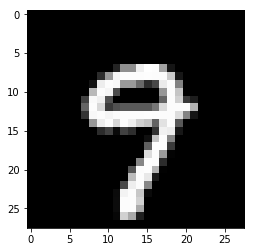

9


In [7]:
plt.figure(figsize=(4,4))
index=213
plt.imshow(X.iloc[index].as_matrix().reshape(28,28), interpolation="none", cmap="gray")
plt.show()

print(y[index])

In [8]:
from sklearn.preprocessing import StandardScaler
X_standardized = StandardScaler().fit_transform(X)

In [9]:
print(X_standardized.shape)
print(X_standardized[10,:])

(42000, 784)
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -5.28063530e-03 -6.87837385e-03 -4.87955846e-03 -4.87955846e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -4.87955846e-03 -5.62918092e-03 -9.32058423e-03 -1.17998060e-02
 -1.63061719e-02 -2.03752520e-02 -2.59514740e-02 -2.99643170e-02
 -3.19107654e-02 -3.22486821e-02 -3.25422311e-02 -2.99246677e-02
 -2.98195932e-02 -2.79072967e-02 -2.35148150e-02 -1.75808468e-02
 -1.53656634e-02 -9.63815429e-03 -8.30613350e-03 -5.23595180e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -4.87955846e-03 -4.87955846e-03
 -8.00884680

In [27]:
from sklearn.decomposition import PCA
# Initializing PCA
pca = PCA(n_components=2)
X_data_pca_fit = pca.fit_transform(X_standardized)
print(X_data_pca_fit.shape)

(42000, 2)


In [28]:
print(X_standardized.shape)

(42000, 784)


In [44]:
data_pca_fit_stacked = np.vstack((X_data_pca_fit.T, y)).T

df_mnist_pca_fit = pd.DataFrame(data=data_pca_fit_stacked, columns=["1st_principal_component", \
                                                                    "2nd_principal_component", "Label"])
df_mnist_pca_fit.head()

,1st_principal_component,2nd_principal_component,Label
0,-5.140466,-5.226573,1.0
1,19.292380,6.033337,0.0
2,-7.644503,-1.705629,1.0
3,-0.474300,5.836156,4.0
4,26.559601,6.024884,0.0


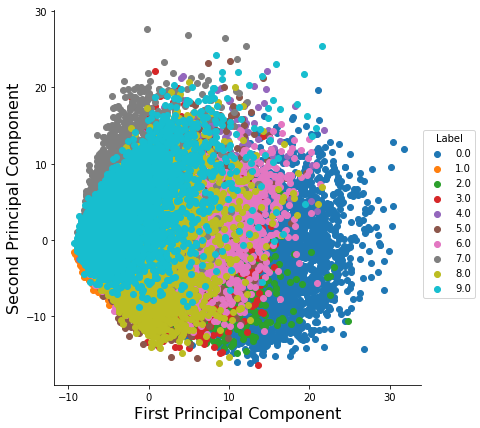

In [59]:
g=sbn.FacetGrid(data=df_mnist_pca_fit, hue='Label', size=6).map(plt.scatter, '1st_principal_component',\
                                                               '2nd_principal_component').add_legend()
g.set_xlabels('First Principal Component', fontsize=16)
g.set_ylabels('Second Principal Component', fontsize=16)
g.set_titles('Digit clusters after applying PCA', fontsize=15)


Now, let's change the number of components of the PCA model

In [74]:
pca.n_components = 784
pca_all_components = pca.fit_transform(X)
percentage_of_variance_explained = pca.explained_variance_ / np.sum(pca.explained_variance_)
cumulative_variance_explained = np.cumsum(percentage_of_variance_explained)

**With 200 components, we can express about 90% of the variance in the data**

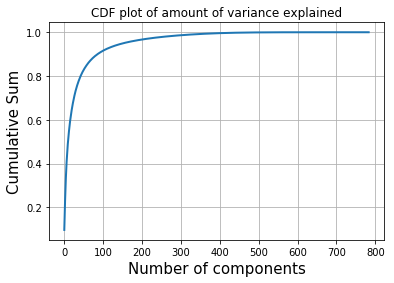

In [75]:
plt.plot(cumulative_variance_explained, linewidth=2)
plt.xlabel('Number of components', fontsize=15)
plt.ylabel('Cumulative Sum', fontsize=15)
plt.title('CDF plot of amount of variance explained')
plt.grid()

### t-SNE

In [10]:
from sklearn.manifold import TSNE
# picking the first 10,000 data points as TSNE is very expensive to be run on a laptop
X_10000 = X_standardized[:10000,:]
y_10000 = y[:10000]
print(X_10000.shape)
print(y_10000.shape)

(10000, 784)
(10000,)


In [11]:
tsne= TSNE(n_components=2, random_state=33, perplexity=40, n_iter=3000, n_iter_without_progress=350)
X_10000_tsne = tsne.fit_transform(X_10000)

In [12]:
X_10000_tsne.shape

(10000, 2)

In [13]:
data_tsne_fit = np.vstack((X_10000_tsne.T, y_10000)).T
print(data_tsne_fit.shape)
df_tsne = pd.DataFrame(data=data_tsne_fit, columns=['Dimension 1', 'Dimension 2', 'Digit Label'])

(10000, 3)


Text(0.5,1,'Clusters using two dimensions with t-SNE')

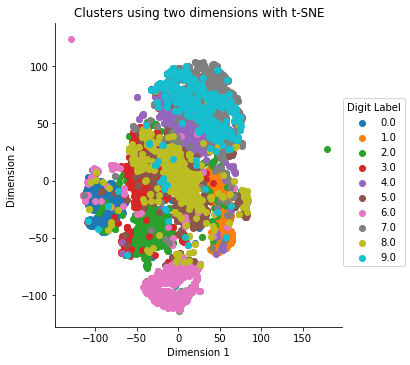

In [14]:
sbn.FacetGrid(data=df_tsne, hue='Digit Label', size=5).map(plt.scatter, 'Dimension 1', 'Dimension 2').add_legend()
plt.title('Clusters using two dimensions with t-SNE')